In [ ]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [ ]:
# importing libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


In [ ]:
'''  for tensor you should go to tensorflow documantation a very well prepared document then next move to pytorch
      as I know tensor so I dont mention in this notebook  https://www.tensorflow.org/guide/tensor '''

'''  1. Tensors
  2. Datasets and DataLoaders
  3. Transforms
  4. Build Model
  5. Automatic Differentiation
  6. Optimization Loop
  7. Save, Load and Use Model'''

In [ ]:
torch.arange(-10,10,1)# same as np.arange

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [ ]:
# Tensor
'''torch.normal(mean, std, *, generator=None, out=None) → Tensor'''
t1=torch.normal(mean=0.0, std=1.0,size=(10,)) # sampling a number from same distribution each time
t1

tensor([ 1.0357,  1.4208, -0.2627,  2.0913,  0.8131, -1.0280,  0.0893, -0.2147,
        -0.1969,  0.4757])

In [ ]:
torch.linspace(0.0,1.0,5)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

In [ ]:
# Each time sampling done from different normal dist mean=[differnt means each time], std=[different std for each time]
t2=torch.normal(mean=torch.linspace(0.0,1.0,5),std=torch.linspace(0.0,1.0,5))
t2


tensor([0.0000, 0.4724, 0.5417, 0.0219, 1.3076])

In [ ]:
# randn method
'''Returns a tensor filled with random numbers from a normal distribution with
 mean 0 and variance 1 (also called the standard normal distribution). out i∼N(0,1)'''
t3=torch.randn(size=(4,))
t3

tensor([-0.0123,  0.4052, -0.8559, -0.8982])

In [ ]:
# rand method
'''Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)'''
t4=torch.rand(size=(4,))
t4


tensor([0.9543, 0.2974, 0.8546, 0.4601])

In [ ]:
# creating scaler one
t5=torch.tensor(7)
t5

tensor(7)

In [ ]:
# checking dimension of tensor
t4.ndim

1

In [ ]:
#
image=torch.rand(size=(224,224,3))

In [ ]:
image.size()

torch.Size([224, 224, 3])

In [ ]:
image.numel()

150528

In [ ]:
image.ndim

3

In [ ]:
zeros=torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# 1 layer of NN
in_feature=5
out_feature=4
weights=torch.randn(size=(out_feature,in_feature))
bias=torch.zeros(size=(out_feature,1))

In [ ]:
bias

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
b2=torch.ones(size=(out_feature,1))

In [ ]:
b2

tensor([[1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
b2.dtype

torch.float32

In [ ]:
b2.ndim

2

In [ ]:
# zeros_like,ones_like creating tensor from existing one argument--> tensor
b3=torch.zeros_like(b2)
print(b2.shape,b3.shape,sep='--',end='*-----------------*\n')
print(b2)
print(b3)
''' zeros,zeros_like are indepedent tensors'''


torch.Size([4, 1])--torch.Size([4, 1])*-----------------*
tensor([[1.],
        [1.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
linear_scale=torch.arange(start=0,end=10,step=1)
linear_scale

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# changing content of tensor -->mutable object
linear_scale[2]=23
linear_scale

tensor([ 0,  1, 23,  3,  4,  5,  6,  7,  8,  9])

In [ ]:
# device - what device is the tensor stored on ? torch.device
linear_scale.device

device(type='cpu')

In [ ]:
bias.device

device(type='cpu')

In [1]:
import torch

In [2]:
# creating some matrix
m1=torch.eye(n=4,m=4) # n--> no.of rows,m--> no.of cols
m1 # creating an identity matrix

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [4]:
torch.empty(size=(5,5))

tensor([[2.5667e-09, 2.6430e-06, 1.4580e-19, 1.1495e+24, 3.0881e+29],
        [1.5766e-19, 1.8889e+31, 7.2065e+31, 2.8404e+29, 2.3089e-12],
        [1.9421e+31, 2.7491e+20, 6.1949e-04, 1.9421e+31, 2.7491e+20],
        [2.3078e-12, 7.1760e+22, 7.2250e+28, 1.5766e-19, 2.6285e-06],
        [2.6308e+20, 5.2884e+22, 2.1180e+23, 6.6767e+22, 3.3379e-09]])

In [5]:
x = torch.zeros(2, 1, 2, 1, 2)

In [9]:
x.shape

torch.Size([2, 1, 2, 1, 2])

work only single dimension

In [15]:
torch.squeeze(input=x,dim=1).shape # remove single dimension from specified pos

torch.Size([2, 2, 1, 2])

In [16]:
# unsequeeze add a single dim at specified pos
torch.unsqueeze(input=x,dim=1).shape


torch.Size([2, 1, 1, 2, 1, 2])

In [17]:
# Create a 3×4 sparse tensor useful in nueral graph operations
sparse = torch.sparse_coo_tensor(
    indices=[[0, 1], [2, 0]],# indices specified where element is zero
    values=[5, 10],# non_zero values
    size=(3, 3)# size
)
dense = sparse.to_dense()
print(dense)
# dense tensor--> normal tensor

tensor([[ 0,  0,  5],
        [10,  0,  0],
        [ 0,  0,  0]])


In [18]:
sparse

tensor(indices=tensor([[0, 1],
                       [2, 0]]),
       values=tensor([ 5, 10]),
       size=(3, 3), nnz=2, layout=torch.sparse_coo)

In [25]:
torch.empty(size=[1,0])

tensor([], size=(1, 0))

In [20]:
S = torch.sparse_coo_tensor(torch.empty([1, 0]), torch.empty([0, 2]), [1, 2])

In [21]:
S

tensor(indices=tensor([], size=(1, 0)),
       values=tensor([], size=(0, 2)),
       size=(1, 2), nnz=0, layout=torch.sparse_coo)

### 2. Autogradient

In [26]:
x = torch.randn((1, 1), requires_grad=True)
with torch.autograd.profiler.profile() as prof:
    for _ in range(100):  # any normal python code, really!
        y = x ** 2
        y.backward()
# NOTE: some columns were removed for brevity
print(prof.key_averages().table(sort_by="self_cpu_time_total"))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                              aten::mul        31.63%      27.416ms        43.87%      38.029ms     190.144us           200  
                                              aten::pow        23.99%      20.797ms        27.67%      23.986ms     119.928us           200  
                                            aten::copy_        14.21%      12.316ms        14.21%      12.316ms      61.580us           200  
                                       aten::empty_like        10.16%       8.810ms        10.67%       9.249ms      92.494us           100  
      

In [41]:
# scaler differentation
def value(x):
  y=x**2+5
  return y
inp=torch.tensor(2.0,requires_grad=True)


def nes(y):
  z=torch.exp(y**2)
  return z

res=nes(value(inp))
res.backward()
print(inp.grad)


tensor(1.0844e+37)


In [17]:
from sklearn.datasets import make_moons
import torch
import matplotlib.pyplot as plt
x, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [18]:
x.shape

(500, 2)

In [19]:
y.shape

(500,)

In [6]:
x

array([[ 8.30857788e-01, -3.34342282e-01],
       [ 9.91709551e-01,  8.78999659e-01],
       [ 1.10724530e+00, -4.70343756e-01],
       [-1.40899180e-01,  1.03314844e+00],
       [ 4.05592166e-01,  1.32852876e+00],
       [ 1.28895069e+00, -5.24079834e-01],
       [ 1.12079473e+00, -2.72254126e-01],
       [ 1.06593729e-01,  1.21210782e+00],
       [ 5.20198504e-01,  5.82883348e-01],
       [ 1.70590095e+00, -3.33066121e-01],
       [ 1.01561986e+00,  2.73026004e-02],
       [-5.22698706e-01,  3.81315376e-01],
       [ 1.69803483e+00, -6.18298670e-01],
       [ 2.41387822e-01,  7.07334462e-01],
       [ 1.34611143e+00, -5.07042180e-01],
       [ 1.27539204e+00, -5.22307686e-01],
       [ 1.98071107e+00,  3.48378058e-01],
       [ 9.39366864e-01,  4.68451809e-01],
       [ 6.62788578e-01, -6.14652226e-01],
       [ 1.73235560e+00, -3.06407313e-01],
       [ 1.92000739e+00,  2.77147626e-01],
       [ 2.20364555e+00,  4.45032301e-01],
       [-2.36031096e-01,  2.03082090e-01],
       [ 9.

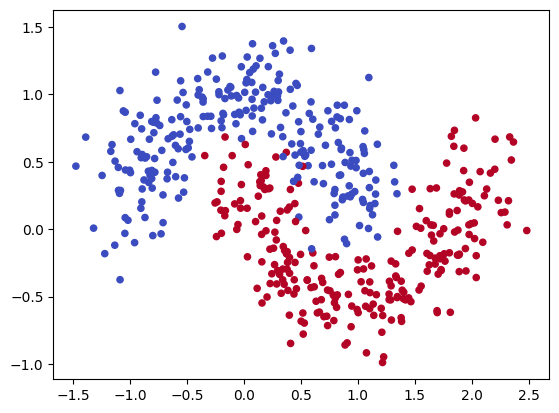

In [9]:
plt.scatter(x[:, 0], x[:, 1],c=y, cmap=plt.cm.coolwarm, s=20)

In [13]:
y[:5]

tensor([1., 0., 1., 0., 0.])

In [16]:
torch.randperm(100)[:10]

tensor([91, 40,  2, 52,  9, 61, 93, 45, 32])

Epoch 1, Loss: 0.7020
Epoch 2, Loss: 0.7020
Epoch 3, Loss: 0.7020
Epoch 4, Loss: 0.7020
Epoch 5, Loss: 0.7019
Epoch 6, Loss: 0.7019
Epoch 7, Loss: 0.7019
Epoch 8, Loss: 0.7019
Epoch 9, Loss: 0.7019
Epoch 10, Loss: 0.7018


<ipython-input-36-a519d2b5111c>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
<ipython-input-36-a519d2b5111c>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


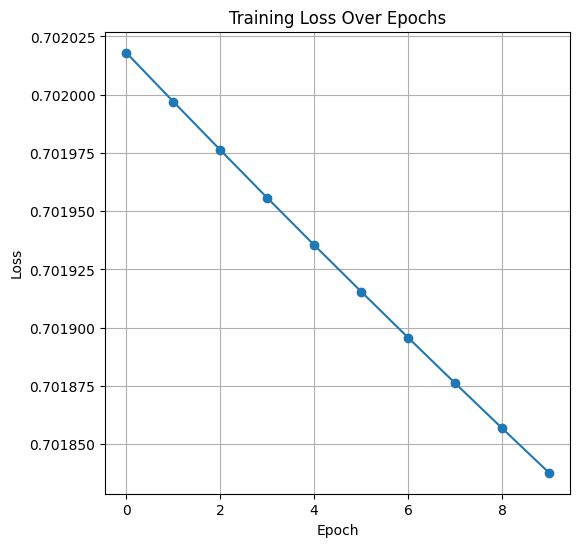

In [36]:
# Manual nueral network


x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Parameters
batch_size = 64
epochs = 10

# Initialization
# PyTorch weight shape: (out_features, in_features), input shape: (batch_size, in_features)
weight1 = torch.randn(size=(7, 2), requires_grad=True)
bias1 = torch.zeros(size=(7, 1), requires_grad=True)

weight2 = torch.randn(size=(3, 7), requires_grad=True)
bias2 = torch.zeros(size=(3, 1), requires_grad=True)

weight3 = torch.randn(size=(1, 3), requires_grad=True)
bias3 = torch.zeros(size=(1, 1), requires_grad=True)

# For storing loss
loss_dict = {}

# Training loop
for i in range(epochs):
    # Mini-batch sampling
    rand = torch.randperm(x.shape[0])[:batch_size]
    x_batch = x[rand]
    y_batch = y[rand]

    # Forward pass
    z1 = x_batch @ weight1.T + bias1.T
    a1 = torch.sigmoid(z1)

    z2 = a1 @ weight2.T + bias2.T
    a2 = torch.sigmoid(z2)

    z3 = a2 @ weight3.T + bias3.T
    a3 = torch.sigmoid(z3)

    # Loss: Binary Cross Entropy
    loss = -(y_batch * torch.log(a3) + (1 - y_batch) * torch.log(1 - a3)).mean()
    print(f"Epoch {i+1}, Loss: {loss.item():.4f}")
    loss_dict[i] = loss.detach().item()

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        weight1 -= 0.01 * weight1.grad
        bias1 -= 0.01 * bias1.grad

        weight2 -= 0.01 * weight2.grad
        bias2 -= 0.01 * bias2.grad

        weight3 -= 0.01 * weight3.grad
        bias3 -= 0.01 * bias3.grad

    # Clear gradients (outside no_grad)
    weight1.grad.zero_()
    bias1.grad.zero_()
    weight2.grad.zero_()
    bias2.grad.zero_()
    weight3.grad.zero_()
    bias3.grad.zero_()

# Plotting the loss curve
plt.figure(figsize=(6, 6))
plt.plot(loss_dict.keys(), loss_dict.values(), marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()


In [37]:
weight1

tensor([[ 1.3220,  0.9024],
        [-1.8317, -0.6074],
        [-0.6973, -1.6772],
        [ 0.9835,  0.8446],
        [-1.3692,  0.0116],
        [-1.1675,  0.5685],
        [-1.2217,  0.1344]], requires_grad=True)

In [38]:
bias1

tensor([[ 8.1466e-05],
        [-5.5942e-05],
        [-3.5074e-05],
        [ 3.4781e-05],
        [ 1.5558e-05],
        [ 1.1939e-04],
        [ 2.5593e-04]], requires_grad=True)